<a href="https://colab.research.google.com/github/jcjang1/kaggle_dataset_maker/blob/main/make_main_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data download

In [ ]:
!gdown 1YdWghK4bmETtCE3_KIwLpSmgFv5kpVaN

Downloading...
From: https://drive.google.com/uc?id=1YdWghK4bmETtCE3_KIwLpSmgFv5kpVaN
To: /content/hubmap-organ-segmentation.zip
100% 6.20G/6.20G [01:16<00:00, 81.1MB/s]


In [ ]:
!unzip /content/hubmap-organ-segmentation.zip

Archive:  /content/hubmap-organ-segmentation.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_images/10078.tiff  
  inflating: train.csv               
  inflating: train_annotations/10044.json  
  inflating: train_annotations/10274.json  
  inflating: train_annotations/10392.json  
  inflating: train_annotations/10488.json  
  inflating: train_annotations/10610.json  
  inflating: train_annotations/10611.json  
  inflating: train_annotations/10651.json  
  inflating: train_annotations/10666.json  
  inflating: train_annotations/10703.json  
  inflating: train_annotations/10892.json  
  inflating: train_annotations/10912.json  
  inflating: train_annotations/10971.json  
  inflating: train_annotations/10992.json  
  inflating: train_annotations/11064.json  
  inflating: train_annotations/1123.json  
  inflating: train_annotations/11448.json  
  inflating: train_annotations/11497.json  
  inflating: train_annotations/1157.json  
  inflati

## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

from tqdm.notebook import tqdm
from PIL import Image

## CSV file Check

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [ ]:
CLASSES = ['background', 'kidney', 'prostate', 'largeintestine', 'spleen', 'lung']

# Make main data
 - Use original data to make png-png dataset

## rle to mask(binary)

In [ ]:
def rle2mask(mask_rle: str, label=1, shape=(3000, 3000)):
    """
    mask_rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = label
    return img.reshape(shape)

In [ ]:
!mkdir /content/png2_originsize_dataset
!mkdir /content/png2_originsize_dataset/binary_masks

In [ ]:
for idx in range(len(train_df)):
    img_id = train_df.loc[idx]['id']
    img_h = train_df.loc[idx]['img_height']
    img_w = train_df.loc[idx]['img_width']
    img_rle = train_df.loc[idx]['rle']

    mask_img = rle2mask(img_rle, shape=(img_w, img_h)).T
    mask_img = Image.fromarray(mask_img)
    mask_img.save(f'/content/png2_originsize_dataset/binary_masks/{img_id}.png')

## rle to mask(multi)

In [ ]:
!mkdir /content/png2_originsize_dataset/multi_masks

In [ ]:
for idx in range(len(train_df)):
    img_id = train_df.loc[idx]['id']
    img_h = train_df.loc[idx]['img_height']
    img_w = train_df.loc[idx]['img_width']
    img_rle = train_df.loc[idx]['rle']
    img_organ = train_df.loc[idx]['organ']

    class_num = CLASSES.index(img_organ)

    mask_img = rle2mask(img_rle, label=class_num, shape=(img_w, img_h)).T

    mask_img = Image.fromarray(mask_img)
    mask_img.save(f'/content/png2_originsize_dataset/multi_masks/{img_id}.png')

## Make tiff image data to png image data

In [ ]:
def tiff2png(path, save_path):
    img_path = glob.glob(os.path.join(path, '*.tiff'))
    
    for imgs in tqdm(img_path):
        img_name = imgs.split('/')[-1].split('.')[0]

        origin_image = cv2.imread(imgs)
        origin_image_arr = np.array(origin_image)

        cv2.imwrite(save_path + img_name + '.png', origin_image_arr)
    
    print('=====>Done<=====')


def png2jpg(path, save_path):
    img_path = glob.glob(os.path.join(path, '*.tiff'))
    
    for imgs in tqdm(img_path):
        img_name = imgs.split('/')[-1].split('.')[0]

        origin_image = cv2.imread(imgs)
        origin_image_arr = np.array(origin_image)

        cv2.imwrite(save_path + img_name + '.png', origin_image_arr)
    
    print('=====>Done<=====')


def jpg2png(path, save_path):
    img_path = glob.glob(os.path.join(path, '*.tiff'))
    
    for imgs in tqdm(img_path):
        img_name = imgs.split('/')[-1].split('.')[0]

        origin_image = cv2.imread(imgs)
        origin_image_arr = np.array(origin_image)

        cv2.imwrite(save_path + img_name + '.png', origin_image_arr)
    
    print('=====>Done<=====')

In [ ]:
def png2jpg(path, save_path):
    img_path = glob.glob(os.path.join(path, '*.tiff'))
    
    for imgs in tqdm(img_path):
        img_name = imgs.split('/')[-1].split('.')[0]

        origin_image = cv2.imread(imgs)
        origin_image_arr = np.array(origin_image)

        cv2.imwrite(save_path + img_name + '.png', origin_image_arr)
    
    print('=====>Done<=====')

In [ ]:
!mkdir /content/png2_originsize_dataset/images

In [ ]:
load_path = '/content/train_images'
save_path = '/content/png2_originsize_dataset/images/'

tiff2png(load_path, save_path)

  0%|          | 0/351 [00:00<?, ?it/s]

=====>Done<=====


### data check

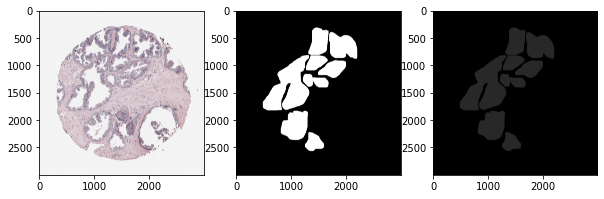

In [ ]:
check_num = 10044

image = cv2.imread(f'/content/png2_originsize_dataset/images/{check_num}.png')
bin_mask = cv2.imread(f'/content/png2_originsize_dataset/binary_masks/{check_num}.png')
mul_mask = cv2.imread(f'/content/png2_originsize_dataset/multi_masks/{check_num}.png')

plt.figure(figsize=(10, 30))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(bin_mask * 255)
plt.subplot(1, 3, 3)
plt.imshow(mul_mask * 20)
plt.show()

# Maked data zip

In [ ]:
!zip -r png2_originsize_dataset.zip ./png2_originsize_dataset

  adding: png2_originsize_dataset/ (stored 0%)
  adding: png2_originsize_dataset/binary_masks/ (stored 0%)
  adding: png2_originsize_dataset/binary_masks/20428.png (deflated 8%)
  adding: png2_originsize_dataset/binary_masks/22310.png (deflated 2%)
  adding: png2_originsize_dataset/binary_masks/30224.png (deflated 66%)
  adding: png2_originsize_dataset/binary_masks/16609.png (deflated 49%)
  adding: png2_originsize_dataset/binary_masks/11629.png (deflated 53%)
  adding: png2_originsize_dataset/binary_masks/11497.png (deflated 40%)
  adding: png2_originsize_dataset/binary_masks/11448.png (deflated 40%)
  adding: png2_originsize_dataset/binary_masks/4412.png (deflated 57%)
  adding: png2_originsize_dataset/binary_masks/5287.png (deflated 27%)
  adding: png2_originsize_dataset/binary_masks/30355.png (deflated 35%)
  adding: png2_originsize_dataset/binary_masks/24097.png (deflated 48%)
  adding: png2_originsize_dataset/binary_masks/18445.png (deflated 2%)
  adding: png2_originsize_dataset/